In [1]:
infile = open ("data/preprocessed.txt",'r',encoding = 'ISO-8859-1')

actor_movies = []
for line in infile:
    actor_movies.append(line[:-1].split("\t\t")) 
    
infile.close()

In [2]:
actDict = {}
movieDict = {}
for e in actor_movies :
    actId = e[0]
    actDict[actId] = e[1:]
    for movieName in e[1:] :
        #num += 1
        movieName.strip(" ")
        movieName.strip("\t")
        #print ("%d %s"%(num,movieName))
        if movieName in movieDict and movieName :
            movieDict[movieName].append(actId)
        else:
            movieDict[movieName] = [len(movieDict)] #movieId
            movieDict[movieName].append(actId)

In [3]:
movies_com23 = [139084,139078,139086,139079,139074,139810,139075,48206,139083,139080,139811,139081,229416,139085]

In [4]:
# File Format: movieName\tmovieId
mapfile = open ("data/movie_id_map.txt",'r',encoding = 'ISO-8859-1')
movieNameDict = {}
movieIdDict = {}
for line in mapfile:
    name = line[:-1].split("\t")[0]
    idx = eval(line[:-1].split("\t")[1])
    if idx in movies_com23:
        movieNameDict[name] = idx
        movieIdDict[idx] = name
mapfile.close()

In [5]:
movieDict_com23 = {}
for idx in movies_com23:
    movieDict_com23[idx] = movieDict[movieIdDict[idx]]

In [6]:
print(len(movieDict_com23))
print(movieDict_com23[139084])

14
[139084, '7234', '7282', '16974', '21959', '37125', '38590', '80552', '88081', '103609', '110014']


In [16]:
actDict_com23 = {}
actors_com23 = []
bi_edges_com23 = []
for k,v in movieDict_com23.items():
    for a in v[1:]:
        bi_edges_com23.append((k,a))
        if a not in actors_com23:
            actors_com23.append(a)
        if a in actDict_com23:
            actDict_com23[a].append(k)
        else:
            actDict_com23[a] = [k]

In [19]:
print (len(actors_com23))
print (len(actDict_com23))
print (actDict_com23['7234'])

18
18
[139074, 139078, 139079, 139080, 139081, 139083, 139084, 48206, 139085, 139075, 139086]


In [22]:
act_movies_num = [len(actDict_com23[a]) for a in actors_com23]
print (act_movies_num)

[11, 11, 13, 10, 13, 13, 11, 11, 10, 10, 1, 1, 1, 1, 1, 1, 1, 1]
16974


In [24]:
print ("Three most important actors/actresses:")
print (actors_com23[2])
print (actors_com23[4])
print (actors_com23[5])

Three most important actors/actresses:
16974
37125
38590


In [9]:
print (len(bi_edges_com23))

121


In [10]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite

In [11]:
B = nx.Graph()
B.add_nodes_from(movies_com23, bipartite=0) # Add the node attribute "bipartite"
B.add_nodes_from(actors_com23, bipartite=1)
B.add_edges_from(bi_edges_com23)

In [12]:
nx.is_connected(B)

True

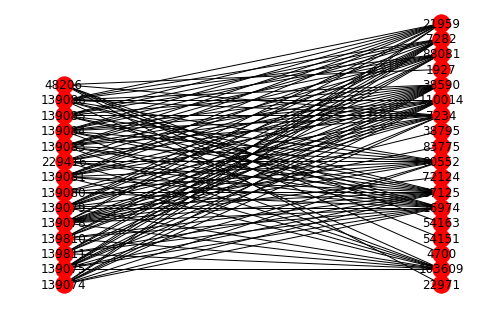

In [15]:
X, Y = bipartite.sets(B)
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(X) ) # put nodes from X at x=1
pos.update( (n, (2, i)) for i, n in enumerate(Y) ) # put nodes from Y at x=2
nx.draw(B, pos=pos, with_labels = True)
plt.show()

In [26]:
actDict_com23['16974']

[139074,
 139811,
 139078,
 139079,
 139080,
 139081,
 139083,
 139084,
 139810,
 139085,
 229416,
 139075,
 139086]

In [30]:
actDict['16974']

['669: Escape the Reality (2011)',
 'An Olimatsim adventure (2011)',
 'Cent jours avant le lendemain (2015)',
 'Des humains bien tranquilles (2016)',
 "L'affaire Hawkins (2014)",
 'La peur anonyme (2014)',
 'La Peur aux trousse (2015)',
 'Le psychologue: le court-métrage (2011)',
 'Les années folles (2016)',
 'Les oiseaux se cachaient pour mourir (2015)',
 'Midnight Stranger (2011)',
 'Mocakoma (2013)',
 'New York Vengeance (2013)',
 'October Sunset (2017)']

In [45]:
most3 = ['16974','37125','38590']
for a in most3:
    print (a)
    in_com23 = len(actDict_com23[a])
    print (in_com23)
    removed = 0
    for mName in actDict[a]:
        if mName not in movieNameDict:
            removed += 1
            #print (mName)
    tot = len(actDict[a])-removed
    print (tot)
    print (1.0*in_com23/tot)

16974
13
13
1.0
37125
13
13
1.0
38590
13
13
1.0


In [39]:
movieid_genre_file = open ("data/movieid_genre.txt",'r',encoding = 'ISO-8859-1')

genreDict = {}
for line in movieid_genre_file:
    movieid = eval(line[:-1].split("\t")[0])
    genre = line[:-1].split("\t")[1]
    if movieid in movies_com23:
        genreDict[movieid] = genre
        
movieid_genre_file.close()

In [42]:
for a in most3:
    print (a)
    num = 0
    for mName in actDict[a]:
        if mName not in movieNameDict:
            continue
        if genreDict[movieNameDict[mName]] == 'Thriller':
            num += 1
    print (1.0*num/len(actDict[a]))

16974
0.7142857142857143
37125
0.5555555555555556
38590
0.5882352941176471


In [40]:
genreDict[movieNameDict[mName]]

'Thriller'